In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
### Step 2 :load the file

### Load and Review Data

In [3]:
df = pd.read_csv("vehicle performance prediction.csv")

In [4]:
df.shape

(398, 9)

In [5]:
df.sample(10)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
155,1,6,250.0,72,3158,19.5,1975,ford maverick,6.377156
187,1,8,305.0,140,4215,13.0,1976,chevrolet chevelle malibu classic,7.440015
311,1,4,98.0,70,2120,15.5,1980,chevrolet chevette,13.647113
83,1,4,98.0,80,2164,15.0,1972,dodge colt (sw),11.904024
262,1,8,305.0,145,3425,13.2,1978,chevrolet monte carlo landau,8.162759
7,1,8,440.0,215,4312,8.5,1970,plymouth fury iii,5.952012
292,1,8,360.0,150,3940,13.0,1979,chrysler lebaron town @ country (sw),7.865159
315,1,4,151.0,90,3003,20.1,1980,amc concord,10.330992
346,3,4,97.0,67,2065,17.8,1981,subaru,13.732142
30,1,4,140.0,90,2264,15.5,1971,chevrolet vega 2300,11.904024


In [6]:
# Dropping/ ignoring the name
df = df.drop("name" , axis = 1)
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,7.652587
1,1,8,350.0,165,3693,11.5,1970,6.377156
2,1,8,318.0,150,3436,11.0,1970,7.652587
3,1,8,304.0,150,3433,12.0,1970,6.802299
4,1,8,302.0,140,3449,10.5,1970,7.227443


In [7]:
# Also replacing the categorical var with actual values:
df["origin"] = df["origin"].replace({1: "America" , 2: "Europe" , 3: "Asia" })
df.sample(10)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
190,America,8,351.0,152,4215,12.8,1976,6.164584
354,Europe,4,100.0,?,2320,15.8,1981,14.667458
203,Europe,4,97.0,71,1825,12.2,1976,12.541739
283,America,6,232.0,90,3265,18.2,1979,8.587903
312,Asia,4,86.0,65,2019,16.4,1980,15.815346
313,America,4,151.0,90,2678,16.5,1980,11.904024
152,America,6,225.0,95,3264,16.0,1975,8.077730
42,America,8,383.0,180,4955,11.5,1971,5.101724
83,America,4,98.0,80,2164,15.0,1972,11.904024
256,America,6,225.0,100,3430,17.2,1978,8.715446


In [8]:
## one shot encoding
df = pd.get_dummies(df,columns = ["origin"])
df.sample(10)

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,origin_America,origin_Asia,origin_Europe
324,4,85.0,65,2110,19.2,1980,17.345863,0,1,0
121,8,318.0,150,3399,11.0,1973,6.377156,1,0,0
120,4,121.0,112,2868,15.5,1973,8.077730,0,0,1
130,4,122.0,80,2451,16.5,1974,11.053736,1,0,0
369,4,112.0,88,2395,18.0,1982,14.454886,1,0,0
362,6,146.0,120,2930,13.8,1981,10.288478,0,1,0
228,6,250.0,98,3525,19.0,1977,7.865159,1,0,0
396,4,120.0,79,2625,18.6,1982,11.904024,1,0,0
346,4,97.0,67,2065,17.8,1981,13.732142,0,1,0
338,4,135.0,84,2490,15.7,1981,11.563909,1,0,0


In [9]:
## A quick summary of the data columns
df.describe()

,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter,origin_America,origin_Asia,origin_Europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073,0.625628,0.198492,0.175879
std,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917,0.484569,0.399367,0.381197
min,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293,0.000000,0.000000,0.000000
25%,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015,0.000000,0.000000,0.000000
50%,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305,1.000000,0.000000,0.000000
75%,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168,1.000000,0.000000,0.000000
max,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697,1.000000,1.000000,1.000000


In [10]:
df.describe(include = "all")

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,origin_America,origin_Asia,origin_Europe
count,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.454774,193.425879,NaN,2970.424623,15.568090,1976.010050,9.997073,0.625628,0.198492,0.175879
std,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,3.322917,0.484569,0.399367,0.381197
min,3.000000,68.000000,NaN,1613.000000,8.000000,1970.000000,3.826293,0.000000,0.000000,0.000000
25%,4.000000,104.250000,NaN,2223.750000,13.825000,1973.000000,7.440015,0.000000,0.000000,0.000000
50%,4.000000,148.500000,NaN,2803.500000,15.500000,1976.000000,9.778305,1.000000,0.000000,0.000000
75%,8.000000,262.000000,NaN,3608.000000,17.175000,1979.000000,12.329168,1.000000,0.000000,0.000000


In [11]:
df.dtypes
# horsepower cause it does not seem to be recognized as a numerical column 

cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
Kilometer_per_liter    float64
origin_America           uint8
origin_Asia              uint8
origin_Europe            uint8
dtype: object

In [12]:
# isdigit()?  on horsepower
hpIsDigit = pd.DataFrame(df.horsepower.str.isdigit())
# print isDigit  = False
df[hpIsDigit["horsepower"] == False]  # from temp  take those row where hp has false 

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,origin_America,origin_Asia,origin_Europe
32,4,98.0,?,2046,19.0,1971,10.628593,1,0,0
126,6,200.0,?,2875,17.0,1974,8.928018,1,0,0
330,4,85.0,?,1835,17.3,1980,17.388378,0,0,1
336,4,140.0,?,2905,14.3,1980,10.033392,1,0,0
354,4,100.0,?,2320,15.8,1981,14.667458,0,0,1
374,4,151.0,?,3035,20.5,1982,9.778305,1,0,0


In [13]:
# missing have a '?'
# replace the missing value by 'NAN'
df = df.replace('?' , np.NAN)
df[hpIsDigit['horsepower'] == False]
    

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,origin_America,origin_Asia,origin_Europe
32,4,98.0,NaN,2046,19.0,1971,10.628593,1,0,0
126,6,200.0,NaN,2875,17.0,1974,8.928018,1,0,0
330,4,85.0,NaN,1835,17.3,1980,17.388378,0,0,1
336,4,140.0,NaN,2905,14.3,1980,10.033392,1,0,0
354,4,100.0,NaN,2320,15.8,1981,14.667458,0,0,1
374,4,151.0,NaN,3035,20.5,1982,9.778305,1,0,0


There are various way to handle the missing values . drop the rows , replace the missing value with median value etc. of the 398 row  6 have NAN in the horsepower column . we drop the 6 rows - which is not a good idea under all situtions

In [14]:
# instead of dropping the row  we replce the missing value with median value
df.median()

cylinders                 4.000000
displacement            148.500000
horsepower               93.500000
weight                 2803.500000
acceleration             15.500000
year                   1976.000000
Kilometer_per_liter       9.778305
origin_America            1.000000
origin_Asia               0.000000
origin_Europe             0.000000
dtype: float64

In [15]:
# replace the missing value with median value
# Note we donot need to specify the column name below
# every columns missing value is replaced by the column median respectively
medianFiller = lambda x: x.fillna(x.median())
df = df.apply(medianFiller , axis = 0)
df['horsepower'] = df['horsepower'].astype('float64')  # it is converting the object to float


In [16]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,origin_America,origin_Asia,origin_Europe
0,8,307.0,130.0,3504,12.0,1970,7.652587,1,0,0
1,8,350.0,165.0,3693,11.5,1970,6.377156,1,0,0
2,8,318.0,150.0,3436,11.0,1970,7.652587,1,0,0
3,8,304.0,150.0,3433,12.0,1970,6.802299,1,0,0
4,8,302.0,140.0,3449,10.5,1970,7.227443,1,0,0


In [17]:
df.dtypes

cylinders                int64
displacement           float64
horsepower             float64
weight                   int64
acceleration           float64
year                     int64
Kilometer_per_liter    float64
origin_America           uint8
origin_Asia              uint8
origin_Europe            uint8
dtype: object

### BiVariate Plots

A bivariate analysis  among the diffrent variables can be done using scatter matrix plot. Seaborn lib creates a dashboard reflecting useful information about the dimentions. the result can be stored as a .png file.

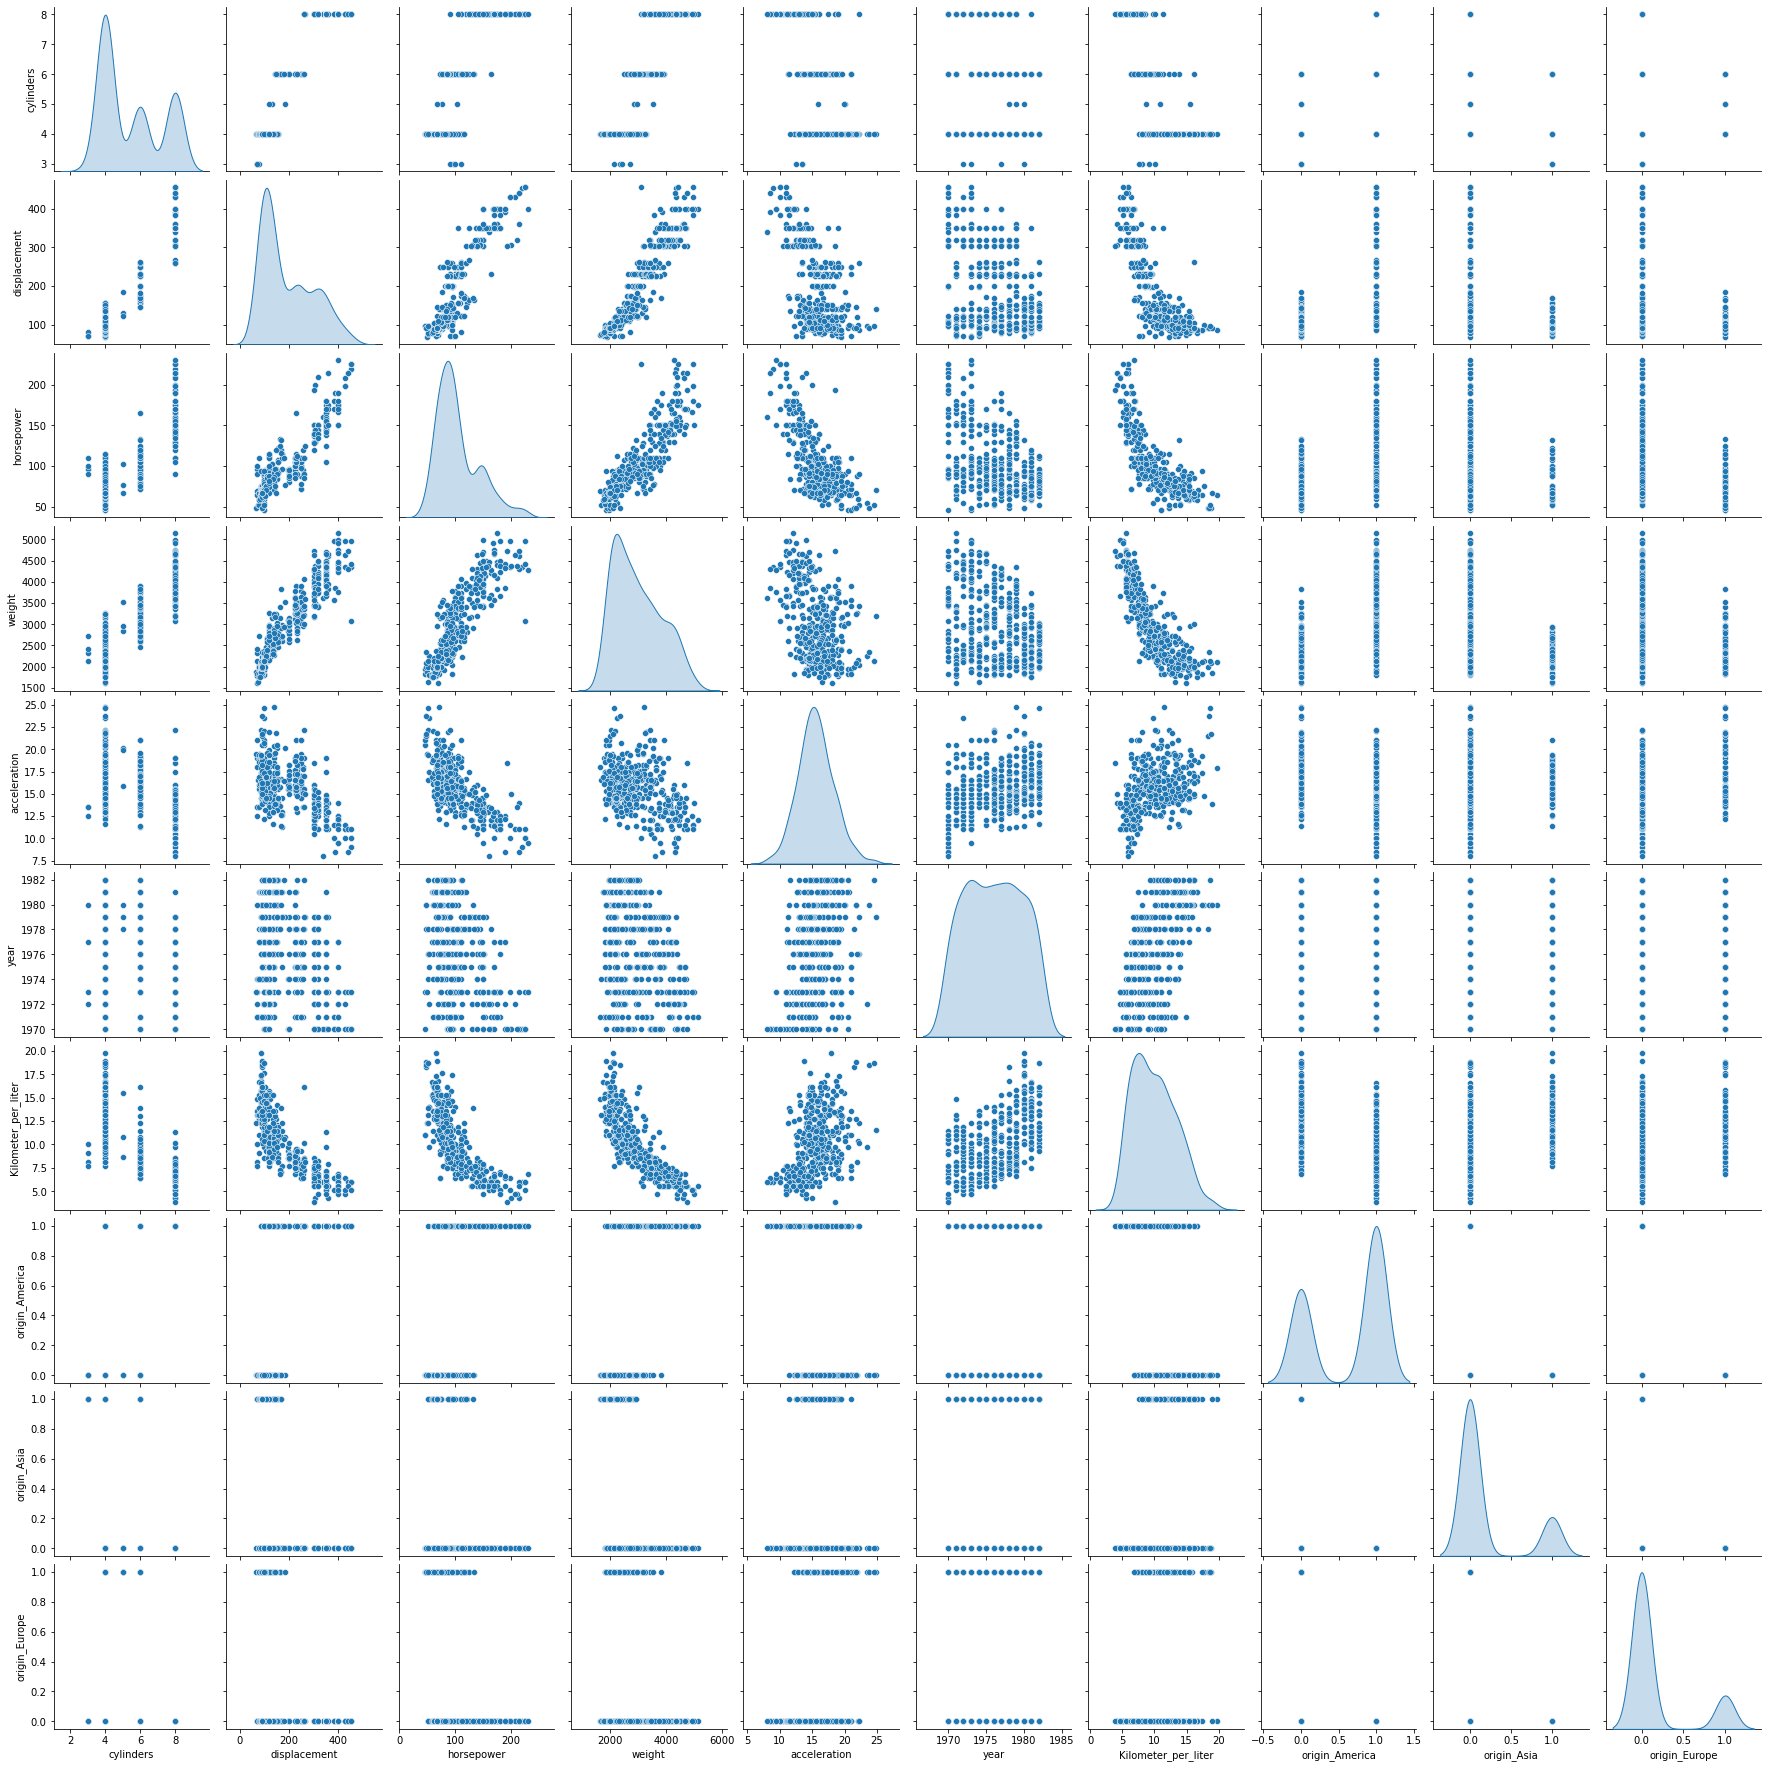

In [18]:
sns.pairplot(df , diag_kind = 'kde')

Observation between 'kmp' and other attributes indicates the relationship is not really linear. However, the plots also indicate that the linearity would still capture quite a bit of useful information/pattern. Several assumptions of classical linear regression seen to be violated , including the assumption of no Heteroscedasticity

### Split Data

In [19]:
# let build our linear model
# independent variables
x = df.drop(['Kilometer_per_liter'] , axis = 1)
y = df[['Kilometer_per_liter']]

In [20]:
# Split x and y into training and test set in 70:30 ratio
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.30 , random_state = 1)

### Fit Linear Model

In [21]:
reg_mode1 = LinearRegression()
reg_mode1.fit(x_train , y_train)

LinearRegression()

In [22]:
reg_mode1.score(x_train , y_train)

0.814102550150869

In [23]:
reg_mode1.score(x_test , y_test)

0.843313513343958

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree =2 , interaction_only = True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(x_train2 , y_train)

y_pred = poly_clf.predict(x_test2)


In [25]:
# print(y_pred)
# in sample(training) R^2 will always improve with the number of variables!
print(poly_clf.score(x_train2 , y_train))

0.9015443634318152


In [26]:
# out of sample(testing) R^2 is our measure of success and does improve
print(poly_clf.score(x_test2 , y_test))

0.8650763327322627


In [28]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

C:\Users\metal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: Unknown label type: 'continuous'